In [2]:
from sklearn import metrics

x = [0, 0, 0, 0]
y = [1, 1, 1, 0]
print("AUC:", metrics.accuracy_score(y, x))

AUC: 0.25


# SVMs Example

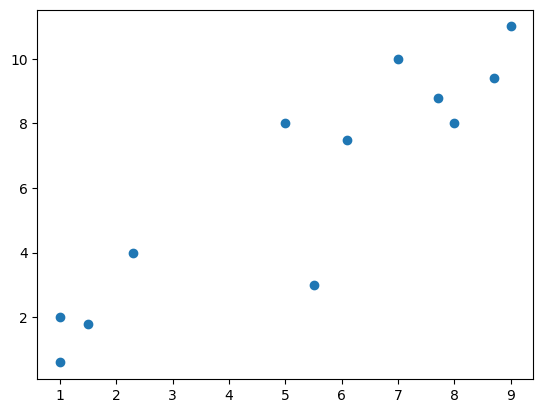

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn import datasets

# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

plt.scatter(X, y)
plt.show()

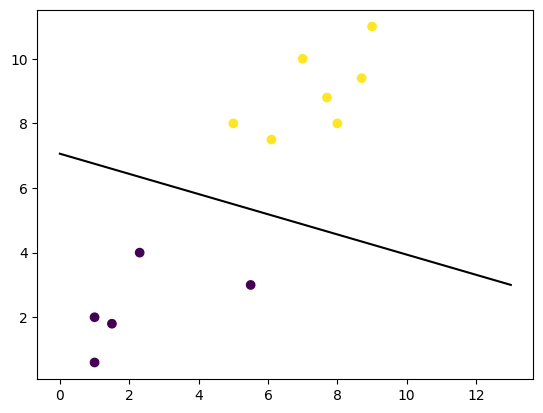

In [ ]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

# define the model
clf = svm.SVC(kernel='linear', C=1) # C is the regularization parameter, low C means larger margin but more misclassifications.
# train the model
clf.fit(training_X, training_y)

"For a 2D problem (i.e., two features), the linear SVM finds a hyperplane:"
"w_1 * x_1 + w_2 * x_2 + b = 0, where w_1 and w_2 are the weights, and b is the bias."
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
# plt.legend()
plt.show()

## Non-Linear Case

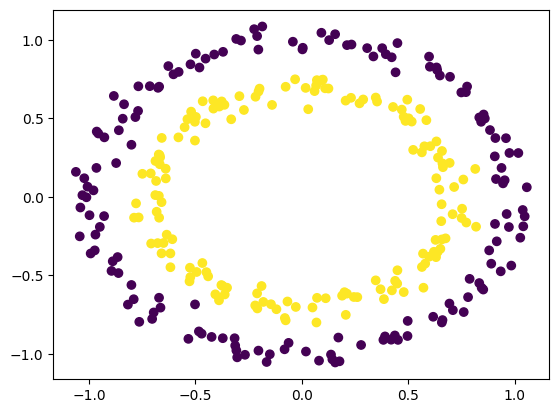

In [8]:
X,y = datasets.make_circles(n_samples=300,factor=0.7, noise=.05)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [18]:
non_lin_clf = svm.SVC(kernel='rbf', C=1)  # gamma is the kernel coefficient for 'rbf'
non_lin_clf.fit(X, y)


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    # shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
    

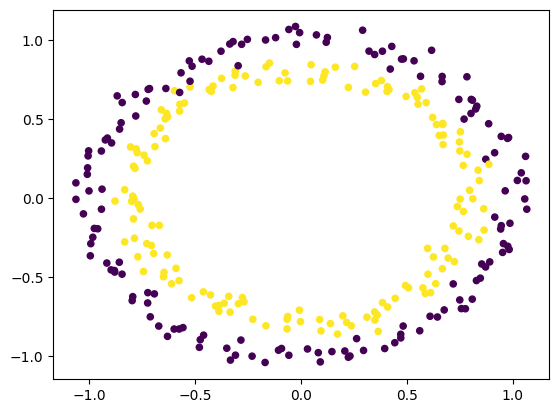

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plot_decision_boundary(non_lin_clf)
plt.scatter(non_lin_clf.support_vectors_[:, 0], non_lin_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

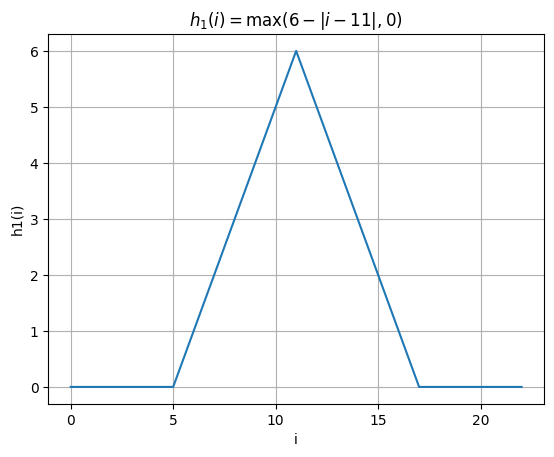

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def h1(i):
    return np.maximum(6 - np.abs(i - 11), 0)

# i ranges over values where the function is non-zero
i = np.arange(0, 23)
values = h1(i)

# Plot
plt.plot(i, values)
plt.title(r'$h_1(i) = \max(6 - |i - 11|, 0)$')
plt.xlabel('i')
plt.ylabel('h1(i)')
plt.grid(True)
plt.show()


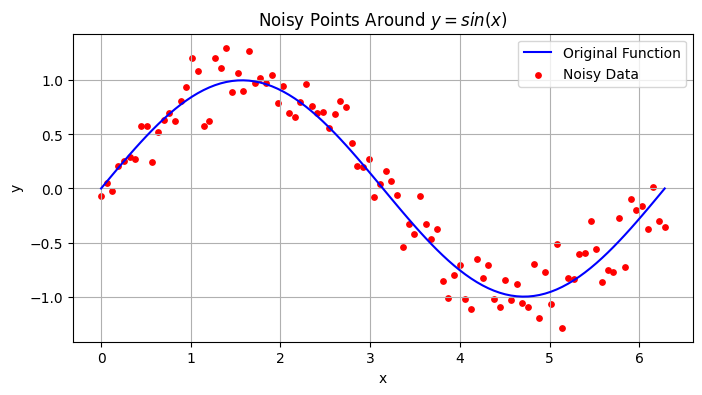

In [ ]:
## Genarate noisy points around a function
import numpy as np
import matplotlib.pyplot as plt

# Base function
def f(x):
    return np.sin(x)

# Generate x values
x = np.linspace(0, 2 * np.pi, 100)

# Generate y values with noise
noise = np.random.normal(0, 0.2, size=x.shape)  # mean 0, std 0.2
y_noisy = f(x) + noise

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, f(x), label='Original Function', color='blue')
plt.scatter(x, y_noisy, label='Noisy Data', color='red', s=15)
plt.legend()
plt.title(r'Noisy Points Around $y = sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


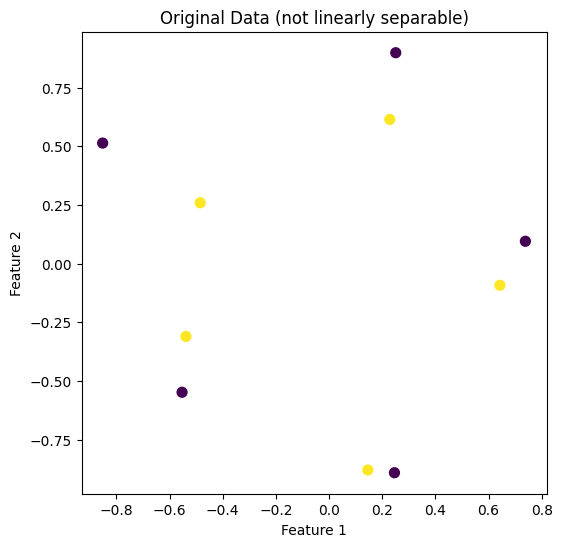

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


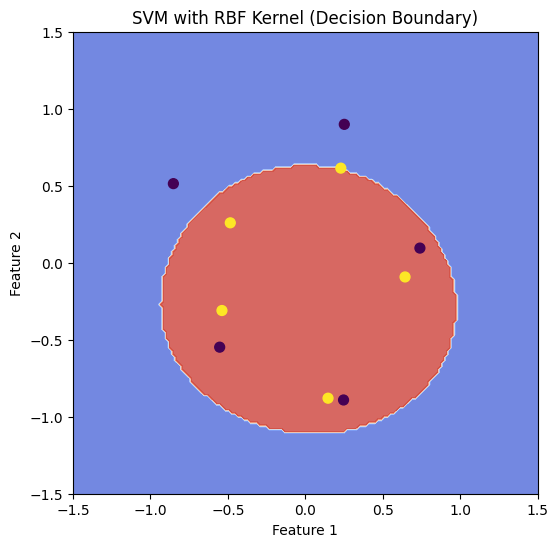

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_circles # To create a non-linearly separable dataset

# 1. Generate synthetic data
X, y = make_circles(n_samples=10, factor=.7, noise=.1, random_state=42) # Creates concentric circles data

# 2. Visualize the original data (not linearly separable)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title("Original Data (not linearly separable)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. Create an SVM classifier with an RBF kernel
# The RBF kernel implicitly maps the data to a higher dimension
# where it becomes linearly separable
clf = svm.SVC(kernel='rbf', gamma='auto')

# 4. Train the SVM
clf.fit(X, y)

# 5. Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 6. Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Returns a flattened 1D array of the same data.
Z = Z.reshape(xx.shape)  # Should match the shape of xx and yy
# print(Z)
# 7. Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # Colored regions for classes
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis') # Original data points
plt.title("SVM with RBF Kernel (Decision Boundary)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

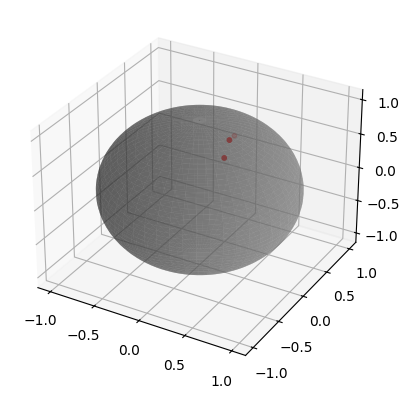

In [ ]:
## Making a Bloch Sphere

theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
X = np.outer(np.sin(theta), np.cos(phi))
Y = np.outer(np.sin(theta), np.sin(phi))
Z = np.outer(np.cos(theta), np.ones_like(phi))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, color='grey', alpha=0.5)
# Scatter plot of point on the Bloch sphere
ax.scatter3D([0.1, 0.1, 0.1],[0.3,0.5,0.4],[0.3,0.5,0.5], color='red', s=10)  # Point on the surface
plt.show()

In [1]:
import qiskit_machine_learning
print(qiskit_machine_learning.__version__)



0.8.3


In [3]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 12345

In [26]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=10,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [27]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()



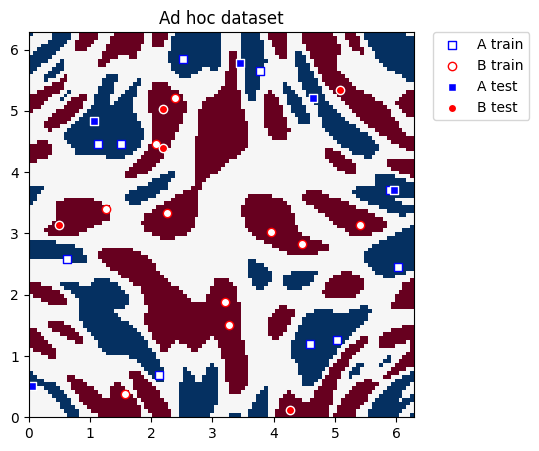

In [28]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

# Kernel Method in Quantum Science Book Ch.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

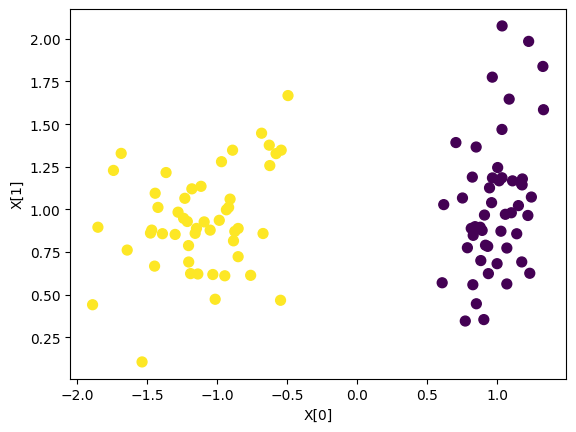

In [3]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='viridis')
plt.xlabel("X[0]") 
plt.ylabel("X[1]")
plt.show()


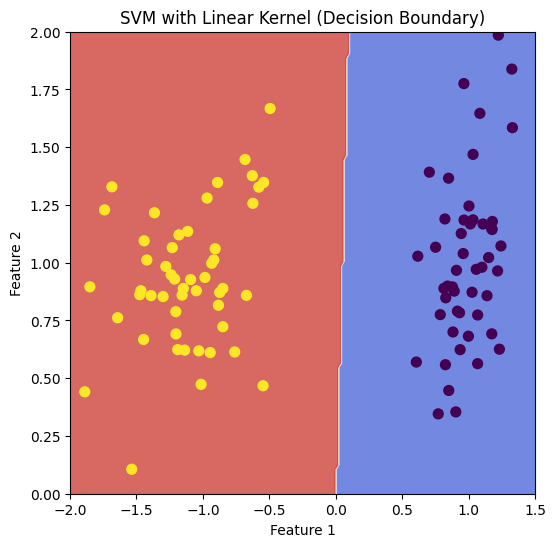

In [ ]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
# Dividing the dataset into training and testing sets
# Here, we use 60% of the data for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    # just plot the dataset first
# cm_bright = ListedColormap(["#FF0000", "#0000FF"])
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k")
clf = svm.SVC(kernel='linear', gamma='auto')

# 4. Train the SVM
clf.fit(X, y)

# 5. Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 6. Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Returns a flattened 1D array of the same data.
Z = Z.reshape(xx.shape)  # Should match the shape of xx and yy
# print(Z)
# 7. Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # Colored regions for classes
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis') # Original data points
plt.title("SVM with Linear Kernel (Decision Boundary)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-2.0,1.5)
plt.ylim(0,2)
plt.show()


# Non Linearly Separable data

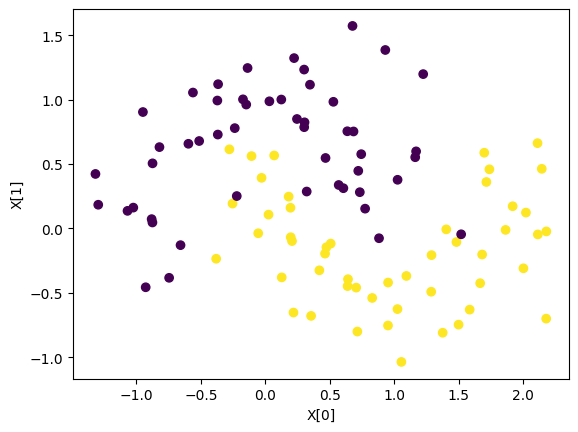

In [3]:
dm=make_moons(noise=0.3, random_state=0)
X, y=dm
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
clf=SVC(gamma=4, C=1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.9333333333333333


In [6]:
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

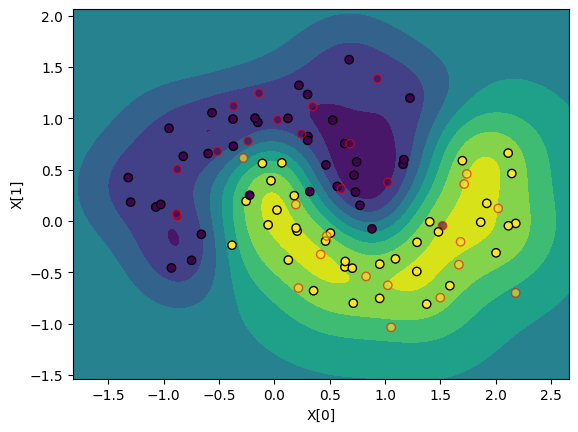

In [9]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()   
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )
plt.xlabel("X[0]")
plt.ylabel("X[1]")
#plt.savefig('./dataset1classifiedGaussian.pdf',dpi='figure', format='pdf',bbox_inches='tight')
plt.show()

In [40]:
print(x_min, x_max, y_min, y_max)

-2.3887398191896665 1.829702988273395 -0.3940635497178083 2.575829711218021


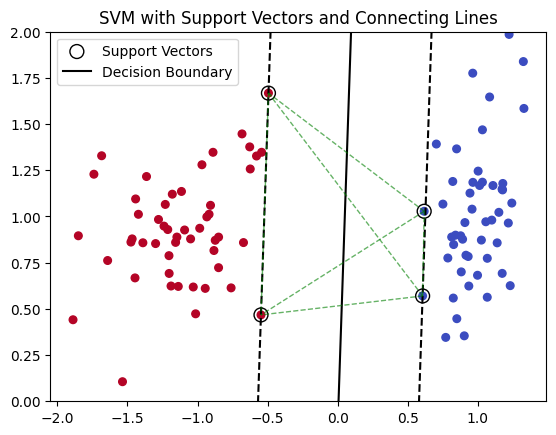

In [11]:
sv = clf.support_vectors_
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)

# Plot support vectors
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
xx = np.linspace(-1, +1)
# xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
yy = -(w[0] * xx + b) / w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# 🧵 Plot lines between support vectors
from itertools import combinations
for (x1, x2) in combinations(sv, 2):
    plt.plot([x1[0], x2[0]], [x1[1], x2[1]], 'g--', linewidth=1, alpha=0.6)
plt.ylim(0, 2)
plt.legend()
plt.title("SVM with Support Vectors and Connecting Lines")
plt.show()

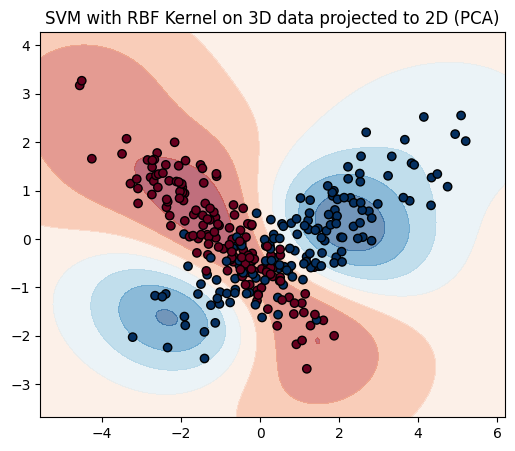

In [13]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Step 1: Create synthetic dataset with 3 features
X, y = make_classification(n_samples=300, n_features=3, n_informative=3, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Step 3: RBF kernel SVM with scaling
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
clf.fit(X_2d, y)  # train on 2D projected data

# Step 4: Plot decision boundary
fig, ax = plt.subplots(figsize=(6, 5))
disp = DecisionBoundaryDisplay.from_estimator(clf, X_2d, response_method="decision_function", 
                                               cmap=plt.cm.RdBu, alpha=0.6, ax=ax)
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
ax.set_title("SVM with RBF Kernel on 3D data projected to 2D (PCA)")
plt.show()


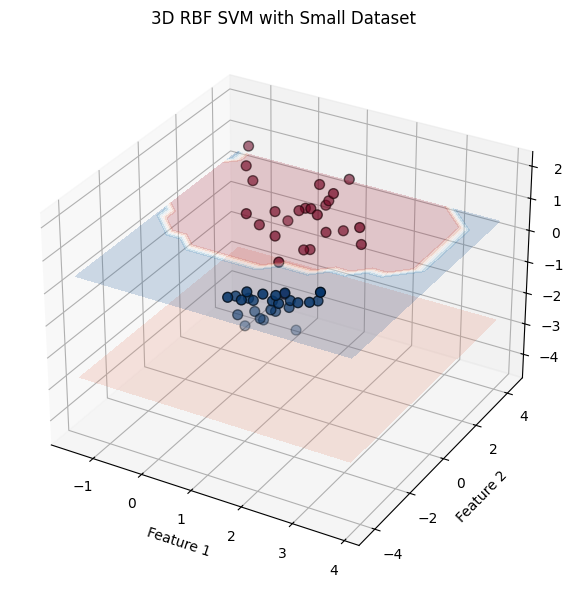

In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate a small 3D dataset
X, y = make_classification(
    n_samples=50,       # small dataset
    n_features=3, 
    n_informative=3, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    random_state=1
)

# Step 2: Train an RBF kernel SVM with scaling
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))
clf.fit(X, y)

# Step 3: Create a grid for plotting decision surface
x_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 20)
y_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 20)
z_range = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, 20)

xx, yy, zz = np.meshgrid(x_range, y_range, z_range)
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
preds = clf.predict(grid).reshape(xx.shape)

# Step 4: Plot the points and decision boundary (as 0.5 contour slice)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdBu, edgecolors='k', s=50)

# Plot decision boundary slice using contour
# We'll plot decision surface at a fixed z-slice for better clarity
for z_slice in np.linspace(X[:, 2].min(), X[:, 2].max(), 5):
    slice_mask = np.abs(zz - z_slice) < 0.1
    if np.any(slice_mask):
        ax.contourf(xx[slice_mask].reshape(20, 20), 
                    yy[slice_mask].reshape(20, 20),
                    preds[slice_mask].reshape(20, 20), 
                    zdir='z', offset=z_slice, alpha=0.2, cmap=plt.cm.RdBu)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D RBF SVM with Small Dataset")
plt.tight_layout()
plt.show()


# Density Matrix
Creating random density matrix pure and mixed states, then classifying them using linear and rbf kernels(SVM) method

Accuracy: 0.625


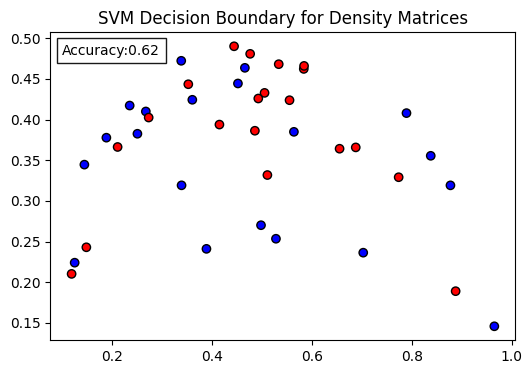

In [52]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# Step 1: Generate 10 random 2x2 density matrices

def random_density_matrix(pure=True):
    
    # Generate a random 2x2 density matrix
    if pure:
        # Pure state: |ψ⟩⟨ψ|
        psi = np.random.rand(2) + 1j * np.random.rand(2)
        psi /= np.linalg.norm(psi)
        return np.outer(psi, np.conj(psi))
    else:
        # Mixed: convex combination of pure states
        rho1 = random_density_matrix(True)
        rho2 = random_density_matrix(True)
        p = np.random.rand()  # Random probability for mixing
        return p * rho1 + (1 - p) * rho2

X = []
y = []

for _ in range(20):
    rho = random_density_matrix(True)
    X.append(rho)
    y.append(1)  # pure

for _ in range(20):
    rho = random_density_matrix(False)
    X.append(rho)
    y.append(0)  # mixed

# random.seed(42)
# random.shuffle(X)
# random.shuffle(y)

# Step 2: Feature extraction
def rho_to_features(rho):
    # Use real and imaginary parts flattened
    return np.hstack([np.real(rho).flatten(), np.imag(rho).flatten()])

X_features = np.array([rho_to_features(rho) for rho in X])
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2,shuffle=True, random_state=42) # shuffle=True to shuffle the data
# Step 3: Train SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
clf.fit(X_train, y_train)

# Step 4: Test results
preds = clf.predict(X_test)

# for i in range(50):
#     label = "Pure" if y[i] else "Mixed"
#     pred = "Pure" if preds[i] else "Mixed"
#     print(f"Sample {i+1}: True: {label}, Predicted: {pred}")
score = clf.score(X_test, y_test)
print("Accuracy:", score)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Step 5: Visualize the decision boundary
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X_features[:, 0], X_features[:, 1], c=y, cmap=cm_bright, edgecolors="k")
ax.text(0.1, 0.48,f"Accuracy:{score:.2f}", fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))
ax.set_title("SVM Decision Boundary for Density Matrices")
plt.show()

In [126]:
X_features.shape

(100, 8)

## Using PCA to convert 8 dim to 2 dimensional data

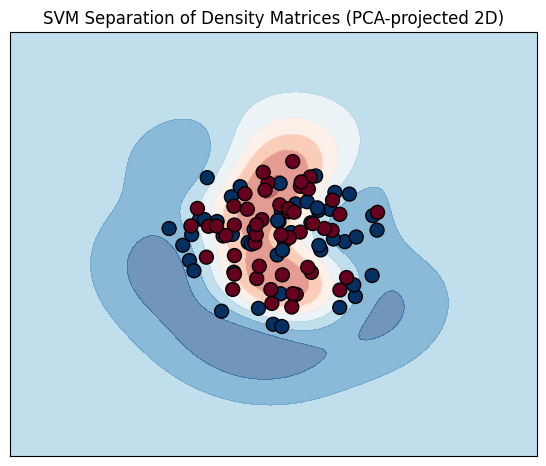

In [127]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Step 1: Reduce features to 2D for plotting
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_features)

# Step 2: Train another classifier on reduced 2D for visualization
clf_2d = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
clf_2d.fit(X_2d, y)

# Step 3: Plot decision boundary
fig, ax = plt.subplots(figsize=(6, 5))
disp = DecisionBoundaryDisplay.from_estimator(clf_2d, X_2d, ax=ax, cmap=plt.cm.RdBu, alpha=0.6)
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, s=100)

# Optional: label points
# for i, (x0, x1) in enumerate(X_2d):
#     ax.text(x0 + 0.05, x1, f'{i+1}', fontsize=8)

ax.set_title("SVM Separation of Density Matrices (PCA-projected 2D)")
plt.tight_layout()
ax.set_xticks(())
ax.set_yticks(())
plt.show()


In [31]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


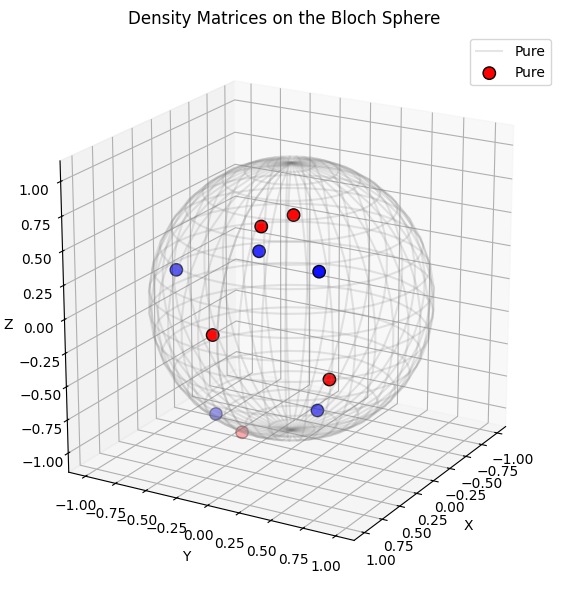

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate pure and mixed density matrices
def random_density_matrix(pure=True):
    if pure:
        psi = np.random.rand(2) + 1j * np.random.rand(2)
        psi /= np.linalg.norm(psi)
        return np.outer(psi, np.conj(psi))
    else:
        rho1 = random_density_matrix(True)
        rho2 = random_density_matrix(True)
        p = np.random.rand()
        return p * rho1 + (1 - p) * rho2

# Convert to Bloch vector
def density_to_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return np.array([x, y, z])

# Create dataset
r_bloch = []
colors = []
labels = []

for _ in range(5):
    rho = random_density_matrix(True)
    r_bloch.append(density_to_bloch_vector(rho))
    colors.append('red')
    labels.append('Pure')

for _ in range(5):
    rho = random_density_matrix(False)
    r_bloch.append(density_to_bloch_vector(rho))
    colors.append('blue')
    labels.append('Mixed')

r_bloch = np.array(r_bloch)

# Plotting Bloch sphere
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw Bloch sphere wireframe
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x_sphere = np.cos(u) * np.sin(v)
y_sphere = np.sin(u) * np.sin(v)
z_sphere = np.cos(v)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='gray', alpha=0.2)

# Plot states
ax.scatter(r_bloch[:, 0], r_bloch[:, 1], r_bloch[:, 2], c=colors, s=80, edgecolors='k')

# Labels and styling
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Density Matrices on the Bloch Sphere')
ax.set_box_aspect([1,1,1])
ax.view_init(elev=20, azim=30)
plt.tight_layout()
plt.show()


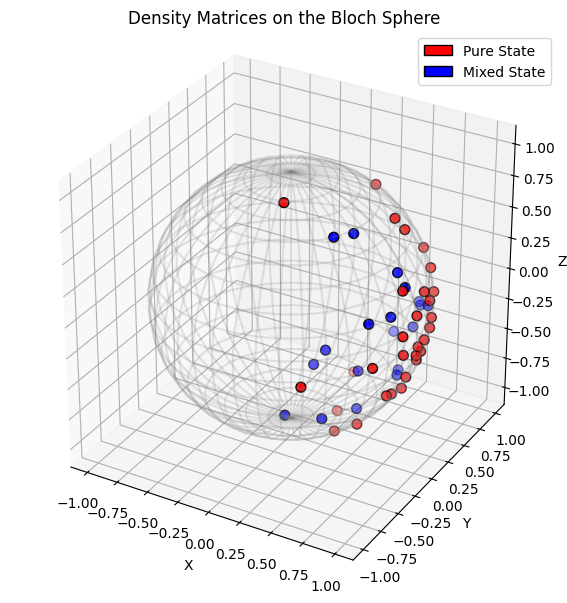

In [58]:
from matplotlib.patches import Patch
def random_density_matrix(pure=True):
    
    # Generate a random 2x2 density matrix
    if pure:
        # Pure state: |ψ⟩⟨ψ|
        psi = np.random.rand(2) + 1j * np.random.rand(2)
        psi /= np.linalg.norm(psi)
        return np.outer(psi, np.conj(psi))
    else:
        # Mixed: convex combination of pure states
        rho1 = random_density_matrix(True)
        rho2 = random_density_matrix(True)
        p = np.random.rand()  # Random probability for mixing
        return p * rho1 + (1 - p) * rho2

X = []
y = []
# Convert to Bloch vector# Convert to Bloch vector
def density_to_bloch_vector(rho):
    x = 2 * np.real(rho[0, 1])
    y = 2 * np.imag(rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return np.array([x, y, z])


# Create dataset
r_bloch = []
colors = []
labels = []
for _ in range(30):
    rho = random_density_matrix(True)
    r_bloch.append(density_to_bloch_vector(rho))
    colors.append('red')
    labels.append('Pure')

for _ in range(20):
    rho = random_density_matrix(False)
    r_bloch.append(density_to_bloch_vector(rho))
    colors.append('blue')
    labels.append('Mixed')

r_bloch = np.array(r_bloch)

# Plotting Bloch sphere
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw Bloch sphere wireframe
u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x_sphere = np.cos(u) * np.sin(v)
y_sphere = np.sin(u) * np.sin(v)
z_sphere = np.cos(v)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color='gray', alpha=0.2)

# Plot states
ax.scatter(r_bloch[:, 0], r_bloch[:, 1], r_bloch[:, 2], c=colors, s=50, edgecolors='k')

# Labels and styling
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Density Matrices on the Bloch Sphere')
ax.set_box_aspect([1,1,1])
# ax.grid(False)
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# ax.view_init(elev=20, azim=30)
legend_elements = [
    Patch(facecolor='red', edgecolor='k', label='Pure State'),
    Patch(facecolor='blue', edgecolor='k', label='Mixed State')
]

# Add the legend to your plot
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


Here we are using various features for X to check for which we get a better accuracy score

Accuracy: 0.75


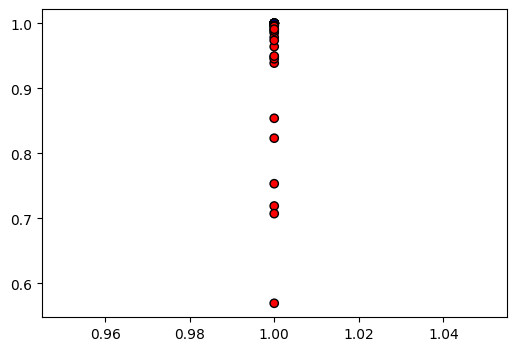

In [1]:
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# Step 1: Generate 10 random 2x2 density matrices

def random_density_matrix(pure=True):
    
    # Generate a random 2x2 density matrix
    if pure:
        # Pure state: |ψ⟩⟨ψ|
        psi = np.random.rand(2) #+ 1j * np.random.rand(2)
        psi /= np.linalg.norm(psi)
        return np.outer(psi, np.conj(psi))
    else:
        # Mixed: convex combination of pure states
        rho1 = random_density_matrix(True)
        rho2 = random_density_matrix(True)
        p = np.random.rand()  # Random probability for mixing
        return p * rho1 + (1 - p) * rho2

X = []
y = []

for _ in range(20):
    rho = random_density_matrix(True)
    X.append(rho)
    y.append(1)  # pure

for _ in range(20):
    rho = random_density_matrix(False)
    X.append(rho)
    y.append(0)  # mixed

# random.seed(42)
# random.shuffle(X)
# random.shuffle(y)

# Step 2: Feature extraction
def rho_to_features(rho):
    # Use real and imaginary parts flattened
    return np.hstack([np.trace(rho),np.trace(rho @ rho)])

X_features = np.array([rho_to_features(rho) for rho in X])
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.4,shuffle=True, random_state=42) # Shuffle to shuffle the data
# Step 3: Train SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
clf.fit(X_train, y_train)

# Step 4: Test results
preds = clf.predict(X_test)

# for i in range(50):
#     label = "Pure" if y[i] else "Mixed"
#     pred = "Pure" if preds[i] else "Mixed"
#     print(f"Sample {i+1}: True: {label}, Predicted: {pred}")
score = clf.score(X_test, y_test)
print("Accuracy:", score)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Step 5: Visualize the decision boundary
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig, ax = plt.subplots(figsize=(6, 4))
# for i in y:
#     j = 0
#     if i == 0:
#         X_features[:,i]= X_features[:,i]*0.9
#         j+=1
# fig, ax = plt.subplots(2, 2, figsize=(8, 6))
# ax[0,0].scatter(X_features[:, 2], X_features[:, 3], c=y, cmap=cm_bright, edgecolors="k")
ax.scatter(X_features[:, 0], X_features[:, 1], c=y, cmap=cm_bright, edgecolors="k")
# ax[1,0].scatter(X_features[:, 1], X_features[:, 2], c=y, cmap=cm_bright, edgecolors="k")
# ax[1,1].scatter(X_features[:, 0], X_features[:, 3], c=y, cmap=cm_bright, edgecolors="k")
# ax.text(0.1, 0.48,f"Accuracy:{score:.2f}", fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))
# ax.set_title("SVM Decision Boundary for Density Matrices")

plt.show()

In [40]:
print(X_features,y)

[[1.         0.81972156]
 [1.         0.62579003]
 [1.         0.51008828]
 [1.         0.53358371]] [1 1 0 0]


In [34]:

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 6. Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Returns a flattened 1D array of the same data.
Z = Z.reshape(xx.shape)  # Should match the shape of xx and yy
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #Returns a flattened 1D array of the same data.
Z = Z.reshape(xx.shape)  # Should match the shape of xx and yy
# print(Z)
# 7. Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # Colored regions for classes
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis') # Original data points
plt.title("SVM with Linear Kernel (Decision Boundary)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(-2.0,1.5)
plt.ylim(0,2)
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [16]:
print(X_features[:,3])

[0.53519913 0.32881963 0.87089192 0.11398608 0.99901873 0.54182454
 0.99493121 0.81060967 0.99978442 0.54758455 0.1906473  0.71104561
 0.7326803  0.3699502  0.07072738 0.85378876 0.28651778 0.21401721
 0.91022066 0.4053469 ]


Accuracy: 0.75


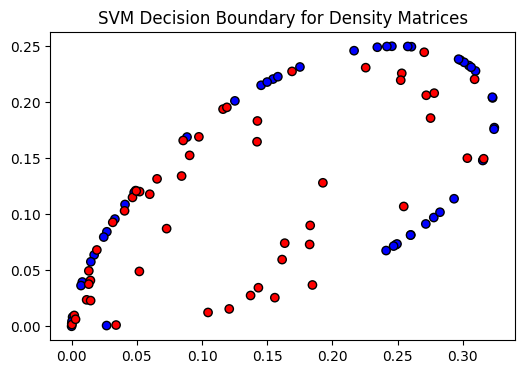

In [ ]:
## Using Non-Linear Features,
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# Step 1: Generate 10 random 2x2 density matrices

def random_density_matrix(pure=True):
 
    # Generate a random 2x2 density matrix
    if pure:
        # Pure state: |ψ⟩⟨ψ|
        psi = np.random.rand(2) #+ 1j * np.random.rand(2)
        psi /= np.linalg.norm(psi)
        return np.outer(psi, np.conj(psi))
    else:
        # Mixed: convex combination of pure states
        rho1 = random_density_matrix(True)
        rho2 = random_density_matrix(True)
        p = np.random.rand()  # Random probability for mixing
        return p * rho1 + (1 - p) * rho2

X = []
y = []

for _ in range(50):
    rho = random_density_matrix(True)
    X.append(rho)
    y.append(1)  # pure

for _ in range(50):
    rho = random_density_matrix(False)
    X.append(rho)
    y.append(0)  # mixed

# random.seed(42)
# random.shuffle(X)
# random.shuffle(y)

# Step 2: Feature extraction
def rho_to_features(rho):
    # Use real and imaginary parts flattened
    return np.hstack([rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]])

#[rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]]

#[rho[0,0]**2 + rho[0,1]*rho[1,0], rho[0,0]*rho[0,1]+rho[0,1]*rho[1,1], rho[0,0]*rho[1,0]+rho[1,0]*rho[1,1],rho[1,1]**2+rho[0,1]*rho[1,0]]
X_features = np.array([rho_to_features(rho) for rho in X])
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2,shuffle=True, random_state=42) # Shuffle to shuffle the data
# Step 3: Train SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=3, C=1))
clf.fit(X_train, y_train)

# Step 4: Test results
preds = clf.predict(X_test)

# for i in range(50):
#     label = "Pure" if y[i] else "Mixed"
#     pred = "Pure" if preds[i] else "Mixed"
#     print(f"Sample {i+1}: True: {label}, Predicted: {pred}")
score = clf.score(X_test, y_test)
print("Accuracy:", score)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Step 5: Visualize the decision boundary
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig, ax = plt.subplots(figsize=(6, 4))
# for i in y:
#     j = 0
#     if i == 0:
#         X_features[:,i]= X_features[:,i]*0.9
#         j+=1

ax.scatter(X_features[:, 3], X_features[:,2], c=y, cmap=cm_bright, edgecolors="k")

# ax.text(0.1, 0.48,f"Accuracy:{score:.2f}", fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))
ax.set_title("SVM Decision Boundary for Density Matrices")

plt.show()

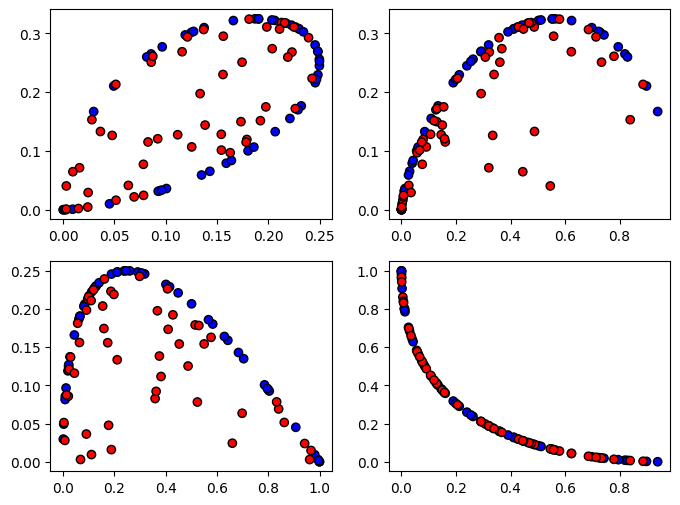

In [239]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0,0].scatter(X_features[:, 2], X_features[:, 5], c=y, cmap=cm_bright, edgecolors="k")
ax[1,0].scatter(X_features[:, 1], X_features[:, 2], c=y, cmap=cm_bright, edgecolors="k")
ax[1,1].scatter(X_features[:, 0], X_features[:, 1], c=y, cmap=cm_bright, edgecolors="k")
ax[0,1].scatter(X_features[:, 0], X_features[:, 5 ], c=y, cmap=cm_bright, edgecolors="k")
plt.show()

In [62]:
def accuracy(pure=True):
    def random_density_matrix(pure=True):
 
    # Generate a random 2x2 density matrix
        if pure:
            # Pure state: |ψ⟩⟨ψ|
            psi = np.random.rand(2) #+ 1j * np.random.rand(2)
            psi /= np.linalg.norm(psi)
            return np.outer(psi, np.conj(psi))
        else:
            # Mixed: convex combination of pure states
            rho1 = random_density_matrix(True)
            rho2 = random_density_matrix(True)
            p = np.random.rand()  # Random probability for mixing
            return p * rho1 + (1 - p) * rho2

    X = []
    y = []

    for _ in range(100):
        rho = random_density_matrix(True)
        X.append(rho)
        y.append(1)  # pure

    for _ in range(100):
        rho = random_density_matrix(False)
        X.append(rho)
        y.append(0)  # mixed

    # random.seed(42)
    # random.shuffle(X)
    # random.shuffle(y)

    # Step 2: Feature extraction
    def rho_to_features(rho):
        # Use real and imaginary parts flattened
        return np.hstack([rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]])

    #[rho[0,0]**2,rho[1,1]**2,rho[0,1]*rho[1,0],rho[0,0]*rho[0,1],rho[0,1]*rho[1,1],rho[0,0]*rho[1,0],rho[1,0]*rho[1,1]]

    #[rho[0,0]**2 + rho[0,1]*rho[1,0], rho[0,0]*rho[0,1]+rho[0,1]*rho[1,1], rho[0,0]*rho[1,0]+rho[1,0]*rho[1,1],rho[1,1]**2+rho[0,1]*rho[1,0]]
    X_features = np.array([rho_to_features(rho) for rho in X])
    y = np.array(y)


    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2,shuffle=True, random_state=42) # Shuffle to shuffle the data
    # Step 3: Train SVM
    clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
    clf.fit(X_train, y_train)

    # Step 4: Test results
    preds = clf.predict(X_test)

    # for i in range(50):
    #     label = "Pure" if y[i] else "Mixed"
    #     pred = "Pure" if preds[i] else "Mixed"
    #     print(f"Sample {i+1}: True: {label}, Predicted: {pred}")
    score = clf.score(X_test, y_test)
    return score

In [71]:
Acc = []
for i in range(50):
    Acc.append(accuracy())
print(np.mean(Acc))


0.6964999999999999


In [100]:
print(rho)

[[0.63818535 0.47445355]
 [0.47445355 0.36181465]]


In [16]:
P = np.array([[1,2],[3,1]])
# print(np.trace(P))
print(P[0,0]**2)


1


In [ ]:
np.random.seed(42)  
np.random.rand(3)

array([0.37454012, 0.95071431, 0.73199394])

# Chapter 2 QML Book

## Squeeze Kernel

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [73]:
h = 0.02  # step size in the mesh
csqueeze=2

def kappa(x,y):
    """ complex scalar product of squeezed vacuum """
    c = 1/np.cosh(csqueeze)
    d = 1-np.exp(1j*(x-y))*np.tanh(csqueeze)**2
    return c/(d**0.5)

In [74]:
xplot = np.linspace(-np.pi,np.pi, 200)
kplot=np.zeros(len(xplot), dtype=complex)
for ip in range(len(xplot)):
    kplot[ip]=kappa(xplot[ip],0.0)

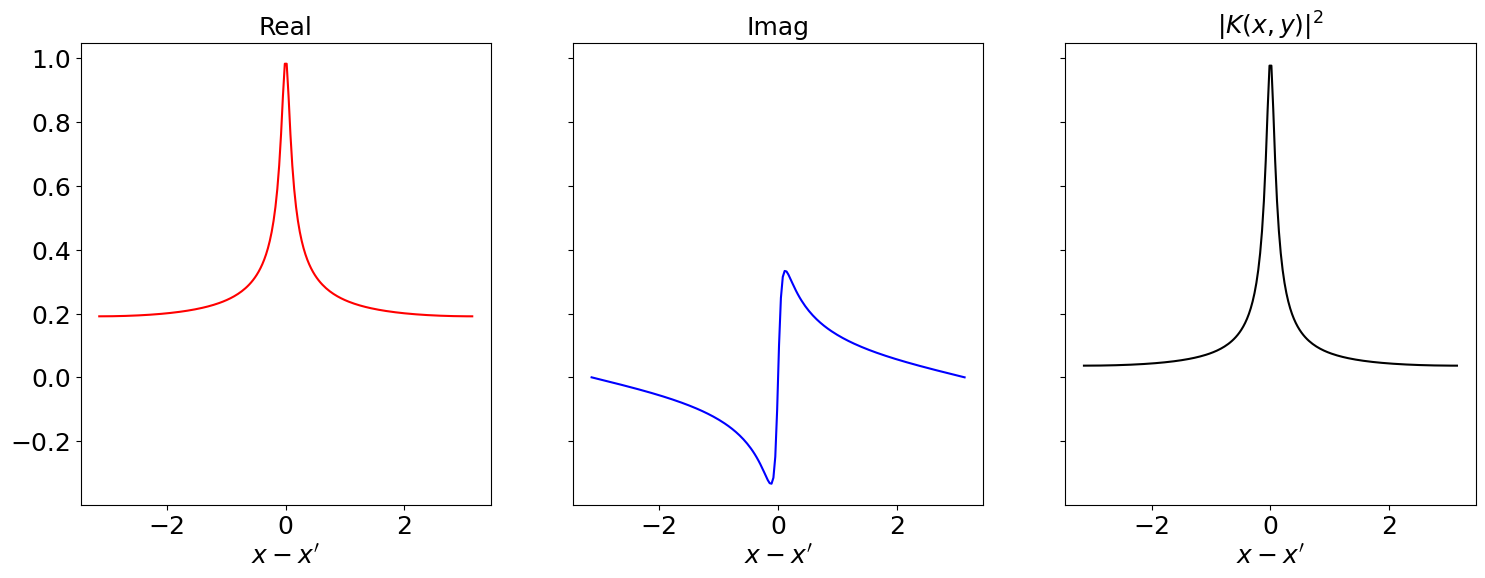

In [86]:
fig1, axs = plt.subplots(1,3, sharey=True, figsize=(18,6))
plt.rcParams['font.size']=18
axs[0].plot(xplot,np.real(kplot),'r')
axs[1].plot(xplot,np.imag(kplot),'b')
axs[2].plot(xplot,np.abs(kplot)**2,'k')
axs[0].set_title('Real', {'fontsize':18})
axs[0].set_xlabel('$x-x\'$', {'fontsize':18})
axs[1].set_title('Imag', {'fontsize':18})
axs[1].set_xlabel('$x-x\'$', {'fontsize':18})
axs[2].set_title('$|K(x,y)|^2$', {'fontsize':18})
axs[2].set_xlabel('$x-x\'$', {'fontsize':18})
plt.show()

In [79]:
## The squeezing kernel
def squeezing_kernel(X, Y):
    """ squeezing kernel for n>1 """
    nb1, nx=X.shape
    nb2, ny=Y.shape    
    out = np.zeros((nb1,nb2))
    s0 = np.cosh(csqueeze)*np.cosh(csqueeze)
    s1 = np.cosh(csqueeze)*np.cosh(csqueeze)
    for ib1 in range(nb1):
        for ib2 in range(nb2):
            d0 = 1-np.exp(1j*(X[ib1,0]-Y[ib2,0]))*np.tanh(csqueeze)*np.tanh(csqueeze)
            d1 = 1-np.exp(1j*(X[ib1,1]-Y[ib2,1]))*np.tanh(csqueeze)*np.tanh(csqueeze)
            out[ib1,ib2]=np.abs(np.sqrt(1.0/(s0*d0*s1*d1)))**2
    return out

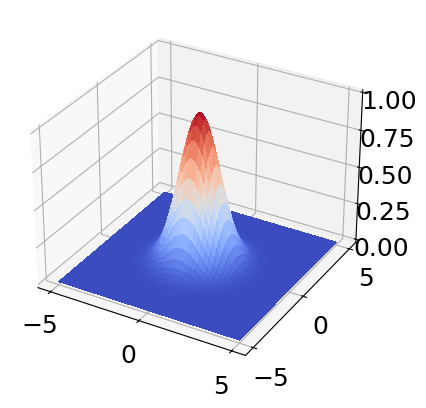

In [91]:
nplot = 100
x1 =np.zeros([nplot,2])
x2 =np.zeros([nplot,2])
x1[:,0] = np.linspace(-5,5,nplot)
x1[:,1] = np.linspace(-5,5,nplot)

# Compute data for coherent state kernel
COEPLOT=np.zeros((nplot,nplot))
x1tmp=np.zeros((1,2))
x2tmp=np.zeros((1,2))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        COEPLOT[i1,i2]=np.exp(-0.5*(x1tmp[0,0]-x2tmp[0,0])**2)*np.exp(-0.5*(x1tmp[0,1]-x2tmp[0,1])**2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
[X,Y]=np.meshgrid(x1[:,0],x1[:,1])
surf = ax.plot_surface(X,Y , COEPLOT, antialiased=False, cmap=cm.coolwarm, linewidth=0)
plt.show()

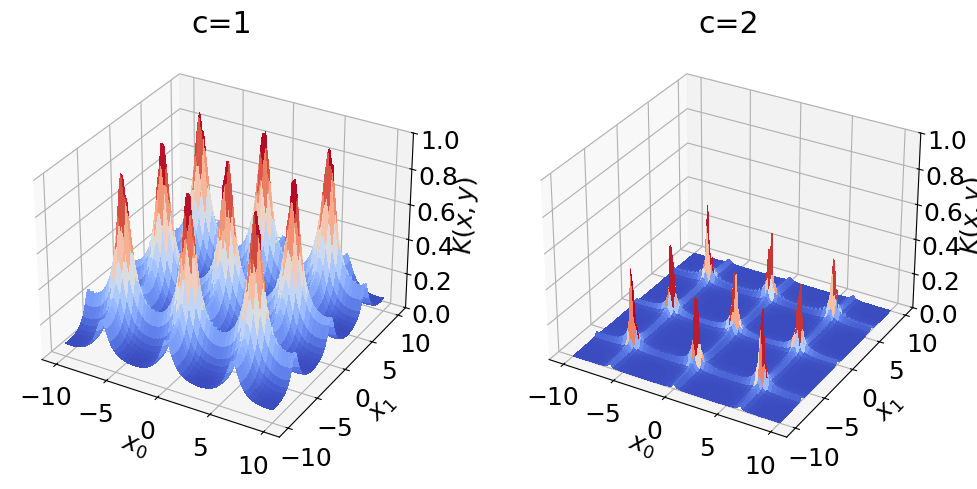

In [97]:
# for c=1 and c=2
x1 =np.zeros([nplot,2])
x2 =np.zeros([nplot,2])
x1[:,0] = np.linspace(-10,10,nplot)
x1[:,1] = np.linspace(-10,10,nplot)

# Compute data for squeezed kernel
csqueeze=1
CFPLOT1=np.zeros((nplot,nplot))
x1tmp=np.zeros((1,2))
x2tmp=np.zeros((1,2))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        CFPLOT1[i1,i2]=squeezing_kernel(x1tmp,x2tmp).item()

csqueeze=2
CFPLOT2=np.zeros((nplot,nplot))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        CFPLOT2[i1,i2]=squeezing_kernel(x1tmp,x2tmp).item()
        
# Plot the surface.
fig, (ax1, ax2) = plt.subplots(1,2,  subplot_kw={"projection": "3d"}, figsize=(12,24))
[X,Y]=np.meshgrid(x1[:,0],x1[:,1])
surf = ax1.plot_surface(X,Y , CFPLOT1, antialiased=False, cmap=cm.coolwarm, linewidth=0)
surf = ax2.plot_surface(X,Y , CFPLOT2, antialiased=False, cmap=cm.coolwarm, linewidth=0)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_title('c=1')
ax1.set_zlabel('$K(x,y)$')
ax1.set_zlim(0,1)
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_title('c=2')
ax2.set_zlabel('$K(x,y)$')
ax2.set_zlim(0,1)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.tight_layout()
plt.show()

In [107]:
names = [
    "SVC with Gaussian RBF",
    "SVC with squeezing kernel",
]

classifiers = [
    SVC(gamma=0.5, C=1),
    SVC(kernel=squeezing_kernel),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [103]:
datasets = [
    make_moons(noise=0.1, random_state=0),
    make_circles(noise=0.1, factor=0.5, random_state=1),
]

In [104]:
ds = make_moons(noise=0.1, random_state=0)
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

In [110]:
squeezing_kernel(X_train,X_train).shape

(60, 60)

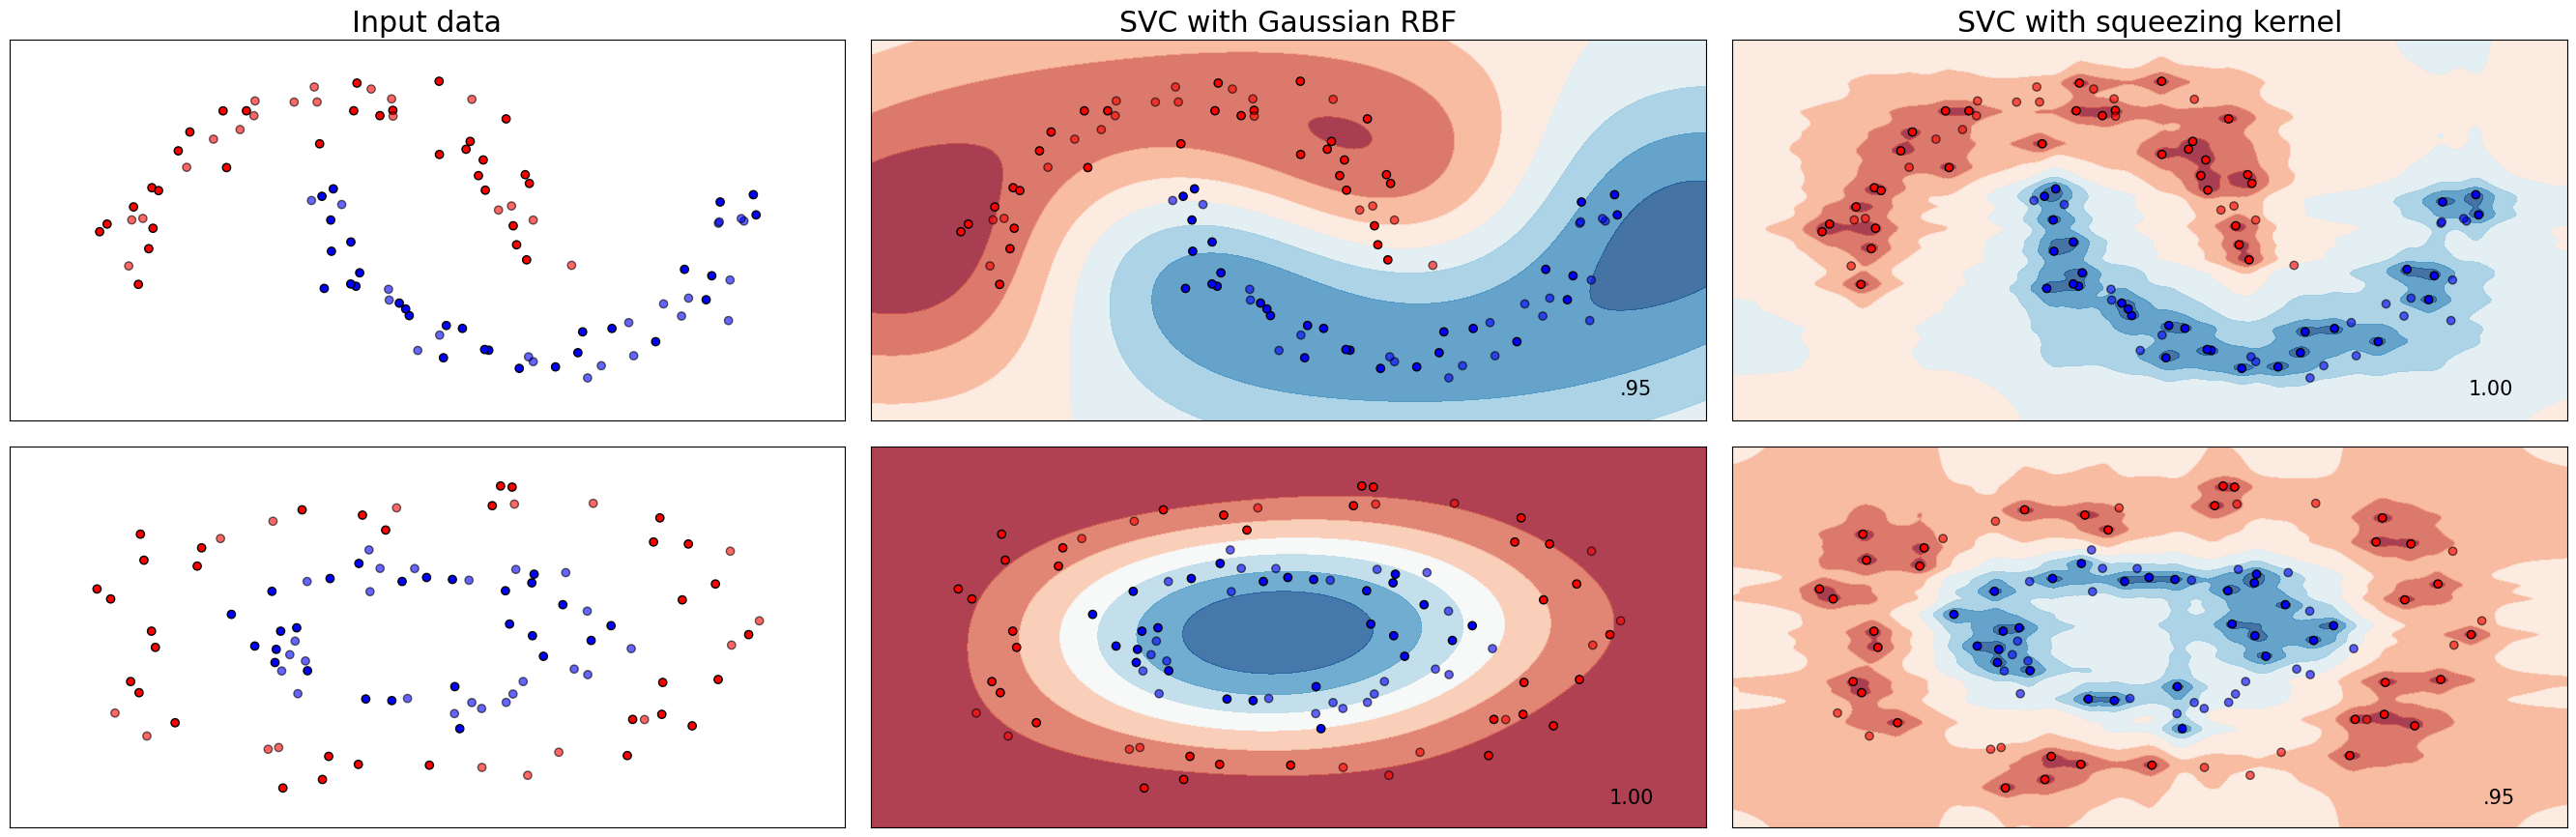

CPU times: total: 1min 4s
Wall time: 1min 5s


In [ ]:
%%time

csqueeze=2 

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

     # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1


     # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:,
                                   1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
# plt.savefig('compare.pdf', format='pdf')
plt.show() #remark, plt.show() must come after plt.savefig